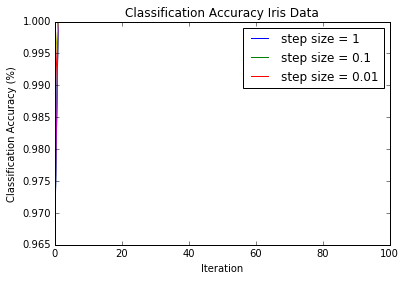

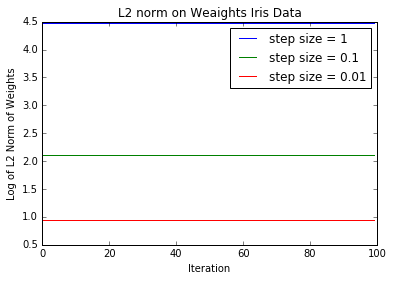

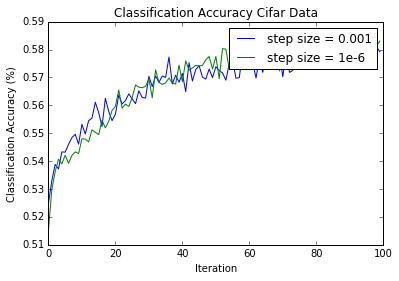

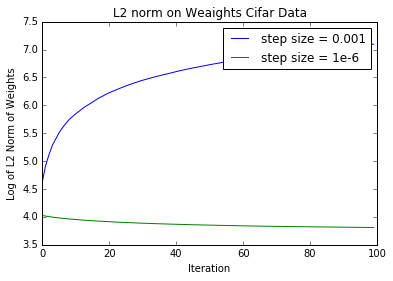

In [6]:
# /usr/bin/env python

import pandas
import numpy as np
import pdb
import time
import matplotlib.pyplot as plt

######## Unpack the iris data ########

data = pandas.read_csv( '/home/nmd89/Dropbox/Graduate Folders/CS 501R - Deep Learning/Lab2/Fisher.csv' )
m = np.array(data)
labels = m[:,0].reshape((len(m),1))
labels[ labels==2 ] = 1  # squash class 2 into class 1
labels = labels.reshape((len(labels),1))
features = m[:,1:5]

######## Unpack the cifar-10 data ########

def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

data = unpickle( '/home/nmd89/Dropbox/Graduate Folders/CS 501R - Deep Learning/Lab2/cifar-10-batches-py/data_batch_1' )

features_cifar = data['data']
labels_cifar = data['labels']
labels_cifar = np.atleast_2d( labels_cifar ).T

# squash classes 0-4 into class 0, and squash classes 5-9 into class 1
labels_cifar[ labels_cifar < 5 ] = 0
labels_cifar[ labels_cifar >= 5 ] = 1


######## setup the Perceptron algorithm ########

def perceptron(x, W, D, ss):
    
    #concatenate a column of ones onto the features sets
    ones = np.ones((len(x),1))
    x = np.concatenate((ones,x),1)
    
    norm = np.array(np.zeros((100,1)))
    y = np.zeros((len(D),1))
    percent = np.array(np.zeros((100,1)))
    
    for k in range(0,100):
        
        for j in range(0,len(x)):
            y[j] = np.sign(W.dot(x[j].T))
            y[j] = np.maximum(0,y[j])
            W = W + ss*(D[j]-y[j])*x[j]
            
        match = len(D[D==y])
        percent[k] = match/float(len(D))
        norm[k] = np.linalg.norm(W)

    return W, percent, norm


######## Run the Perceptron algorithm on the iris data ########

step_size_1 = 1
step_size_2 = 0.1
step_size_3 = 0.01
W_iris = np.random.randn(1,len(features[0])+1)
W_1, percent1, l2norm1 = perceptron(features, W_iris, labels,step_size_1)
W_iris = np.random.randn(1,len(features[0])+1)
W_2, percent2, l2norm2 = perceptron(features, W_iris, labels,step_size_2)
W_iris = np.random.randn(1,len(features[0])+1)
W_3, percent3, l2norm3 = perceptron(features, W_iris, labels,step_size_3)

######## Run the Perceptron algorithm on the cifar data ########

step_size_1 = 0.001
step_size_2 = .00001
W_cifar = np.random.randn(1,len(features_cifar[0])+1)
W_1_cifar, percent1_cifar, l2norm1_cifar = perceptron(features_cifar, W_cifar, labels_cifar,step_size_1)
W_cifar = np.random.randn(1,len(features_cifar[0])+1)
W_2_cifar, percent2_cifar, l2norm2_cifar = perceptron(features_cifar, W_cifar, labels_cifar,step_size_2)

iteration = np.arange(0,len(percent1))
log_l2norm1 = np.log(l2norm1)
log_l2norm2 = np.log(l2norm2)
log_l2norm3 = np.log(l2norm3)

log_l2norm1_cifar = np.log(l2norm1_cifar)
log_l2norm2_cifar = np.log(l2norm2_cifar)

plt.figure(1)
plt.plot(iteration, percent1, iteration, percent2, iteration, percent3)
plt.xlabel('Iteration')
plt.ylabel('Classification Accuracy (%)')
plt.legend(['step size = 1','step size = 0.1','step size = 0.01'])
plt.title('Classification Accuracy Iris Data')

plt.figure(2)
plt.plot(iteration, log_l2norm1, iteration, log_l2norm2, iteration, log_l2norm3)
plt.xlabel('Iteration')
plt.ylabel('Log of L2 Norm of Weights')
plt.legend(['step size = 1','step size = 0.1','step size = 0.01'])
plt.title('L2 norm on Weaights Iris Data')

plt.figure(3)
plt.plot(iteration, percent1_cifar, iteration, percent2_cifar)
plt.xlabel('Iteration')
plt.ylabel('Classification Accuracy (%)')
plt.legend(['step size = 0.001','step size = 1e-6'])
plt.title('Classification Accuracy Cifar Data')

plt.figure(4)
plt.plot(iteration, log_l2norm1_cifar, iteration, log_l2norm2_cifar)
plt.xlabel('Iteration')
plt.ylabel('Log of L2 Norm of Weights')
plt.legend(['step size = 0.001','step size = 1e-6'])
plt.title('L2 norm on Weaights Cifar Data')

plt.show()
